# Feature Crosses

In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [2]:
def preprocess_features(california_housing_dataframe):
    """
    Prepares input features from CA housing data
    
    Args:
        california_housing_dataframe: DataFrame holding CA housing data
    Returns:
        DataFrame holding features, including synthetic features
    """
    selected_features = california_housing_dataframe[[
        "latitude",
        "longitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income"]]
    processed_features = selected_features.copy()
    processed_features['rooms_per_person'] = (
        california_housing_dataframe['total_rooms'] / 
        california_housing_dataframe['population'])
    return processed_features

In [3]:
def preprocess_targets(california_housing_dataframe):
    """
    Prepares targets from CA housing data
    
    Args:
        california_housing_dataframe: DataFrame holding CA housing data
    Returns:
        DataFrame containing target 
    """
    df = pd.DataFrame()
    df['median_house_value'] = california_housing_dataframe['median_house_value'] / 1000.0
    return df

In [4]:
# shuffle data
california_housing_dataframe = california_housing_dataframe.sample(frac=1).reset_index(drop=True)
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


In [5]:
# choose first 12,000 examples for training
training_examples = preprocess_features(california_housing_dataframe).head(12000)
training_targets = preprocess_targets(california_housing_dataframe).head(12000)

In [6]:
# choose last 5,000 examples for validation
validation_examples = preprocess_features(california_housing_dataframe).tail(5000)
validation_targets = preprocess_targets(california_housing_dataframe).tail(5000)

In [7]:
print("Training example summary")
display.display(training_examples.describe())
print("Validation example summary")
display.display(validation_examples.describe())

print("Training targets summary")
display.display(training_targets.describe())
print("Validation targets summary")
display.display(validation_targets.describe())

Training example summary


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.5,28.7,2648.1,539.4,1427.1,501.4,3.9,2.0
std,2.1,2.0,12.6,2202.3,422.4,1124.5,384.5,1.9,1.3
min,32.5,-124.3,1.0,2.0,2.0,3.0,2.0,0.5,0.0
25%,33.9,-121.8,18.0,1465.8,297.0,789.0,282.0,2.6,1.5
50%,34.2,-118.5,29.0,2125.0,434.0,1165.0,409.0,3.6,1.9
75%,37.7,-118.0,37.0,3142.0,648.0,1722.0,605.0,4.8,2.3
max,42.0,-114.3,52.0,37937.0,6445.0,28566.0,6082.0,15.0,55.2


Validation example summary


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.7,-119.6,28.4,2633.0,539.4,1435.5,500.8,3.9,2.0
std,2.1,2.0,12.6,2125.6,419.3,1202.1,384.5,1.9,0.9
min,32.6,-124.3,2.0,8.0,1.0,13.0,1.0,0.5,0.1
25%,33.9,-121.8,18.0,1453.0,296.0,791.0,280.0,2.5,1.5
50%,34.3,-118.5,28.0,2135.0,434.0,1171.5,409.0,3.5,1.9
75%,37.7,-118.0,37.0,3178.2,651.0,1719.0,606.0,4.7,2.3
max,41.9,-114.6,52.0,30405.0,4957.0,35682.0,4769.0,15.0,17.4


Training targets summary


,median_house_value
count,12000.0
mean,208.1
std,116.3
min,15.0
25%,120.3
50%,181.0
75%,266.0
max,500.0


Validation targets summary


,median_house_value
count,5000.0
mean,205.4
std,115.2
min,15.0
25%,118.3
50%,178.4
75%,263.0
max,500.0


In [8]:
def construct_feat_columns(input_features):
    """
    Construct feature columns
    
    Args:
        input_features: Names of numerical input features to use
    Returns:
        Set of TensorFlow feature columns
    """
    
    return set([tf.feature_column.numeric_column(feat) for feat in input_features])

In [9]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """
    Trains a linear regression model on features
    
    Args:
        features: DataFrame of features
        targets: DataFrame of targets
        batch_size: Size of batches to pass to model
        shuffle: Boolean whether to shuffle the data
        num_epochs: Number of epochs to repeat over the data.  None = indefinitely
    Returns:
        Tuple of (features, labels) for next data batch
    """
    
    # construct pandas data into np arrays
    feats = {key: np.array(value) for key,value in dict(features).items()}
    
    # construct dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((feats, targets))
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # shuffle if needed
    if shuffle:
        ds = ds.shuffle(10000)
    
    # return next batch of data
    feats, labels = ds.make_one_shot_iterator().get_next()
    return feats, labels


### FTRL Optmization Algorithm

In [10]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    feature_columns,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """
    Trains a linear regressor model
    
    Also prints training progress, and plots training / validation loss over time
    
    Args:
        learning_rate: A 'float', the learning rate
        steps: A non-zero 'int', the number of training steps.  Training step is a forward and backward step through of a single batch
        batch_size: A non-zero 'int', the batch size
        feature_columns: A 'set', the specified input features
        training_examples: A 'DataFrame', containing at least one column from the CA housing dataset to use as input features for training
        training_targets: A 'DataFrame', containing a single column from the CA housing dataset to use as the training target
        validation_examples: A 'DataFrame', containing at least one column from the CA housing dataset to use as input features for validation
        validation_targets: A 'DataFrame', containing a single column from the CA housing dataset to use as the validation target

    Returns:
        A 'LinearRegressor' model trained on the training data
    """
    
    periods = 10
    steps_per_period = steps / periods
    target_name = "median_house_value"
    
    # create linear regressor 
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 0.5)
    linear_regressor = tf.estimator.LinearRegressor(feature_columns, optimizer=my_optimizer)
    
    training_input_fn = lambda: my_input_fn(training_examples, training_targets[target_name],
                                           batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, training_targets[target_name],
                                                   num_epochs=1, shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, validation_targets[target_name],
                                                      num_epochs=1, shuffle=False)
    
    # train
    print("Training the model...")
    print("RMSE (training):")
    training_rmse = []
    validation_rmse = []
    for period in range(0,periods):
        linear_regressor.train(input_fn=training_input_fn, steps=steps_per_period)
        
        # compute predictions
        training_preds = linear_regressor.predict(predict_training_input_fn)
        training_preds = np.array([item['predictions'][0] for item in training_preds])
        validation_preds = linear_regressor.predict(predict_validation_input_fn)
        validation_preds = np.array([item['predictions'][0] for item in validation_preds])
        
        training_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(training_preds, training_targets))
        validation_root_mean_squared_error = math.sqrt(metrics.mean_squared_error(validation_preds, validation_targets))
        
        print("    %02d : %0.2f" % (period, training_root_mean_squared_error))
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model finished training")
    
    # plot the training and validation loss
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("RMSE vs Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()
    
    return linear_regressor

Training the model...
RMSE (training):
    00 : 851.81
    01 : 569.07
    02 : 441.75
    03 : 394.51
    04 : 385.50
    05 : 322.46
    06 : 338.21
    07 : 234.47
    08 : 242.76
    09 : 234.23
Model finished training


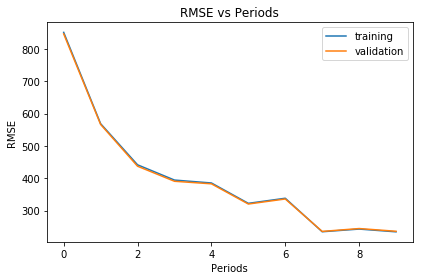

In [11]:
_ = train_model(
    learning_rate=1.0,
    steps=500,
    batch_size=100,
    feature_columns=construct_feat_columns(training_examples),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

### Binned features

(0, 15000)

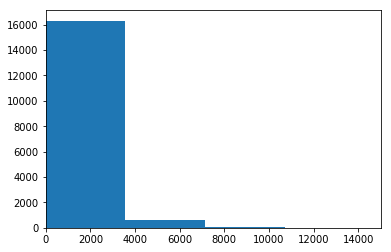

In [12]:
plt.hist(california_housing_dataframe['population'])
plt.xlim(0, 15000)

In [13]:
def get_quantile_based_boundaries(feature_values, num_buckets):
    boundaries = np.arange(1.0, num_buckets) / num_buckets
    quantiles = feature_values.quantile(boundaries)
    return [quantiles[q] for q in quantiles.keys()]

In [14]:
# divide household into 7 buckets
households = tf.feature_column.numeric_column("households")
bucketized_households = tf.feature_column.bucketized_column(
    households, boundaries=get_quantile_based_boundaries(
        california_housing_dataframe['households'], 7))

In [15]:
# divide longitude into 10 buckets
longitudes = tf.feature_column.numeric_column("longitude")
bucketized_longitude = tf.feature_column.bucketized_column(
    longitudes, get_quantile_based_boundaries(
        california_housing_dataframe["longitude"], 10))

## Task 1: Train model on Bucketized Feature Columns

In [16]:
def construct_feature_columns():
    """
    Construct the TensorFlow Feature Columns.
    
    Returns:
        Set of feature columns
    """
    households = tf.feature_column.numeric_column("households")
    longitude = tf.feature_column.numeric_column("longitude")
    latitude = tf.feature_column.numeric_column("latitude")
    housing_median_age = tf.feature_column.numeric_column("housing_median_age")
    median_income = tf.feature_column.numeric_column("median_income")
    rooms_per_person = tf.feature_column.numeric_column("rooms_per_person")
    
    # divide households into 7 buckets
    bucketized_households = tf.feature_column.bucketized_column(
        households, get_quantile_based_boundaries(
            training_examples["households"], 7))
    # divide longitude into 10 buckets
    bucketized_longitude = tf.feature_column.bucketized_column(
        longitude, get_quantile_based_boundaries(
            training_examples["longitude"], 10))
    
    # divice latitude into 10 buckets
    bucketized_latitude = tf.feature_column.bucketized_column(
        latitude, get_quantile_based_boundaries(
            training_examples["latitude"], 10))
    
    # divide housing_median_age into 7 buckets
    bucketized_housing_median_age = tf.feature_column.bucketized_column(
        housing_median_age, get_quantile_based_boundaries(
            training_examples["housing_median_age"], 7))
    
    # divide median_income into 7 buckets
    bucketized_median_income = tf.feature_column.bucketized_column(
        median_income, get_quantile_based_boundaries(
            training_examples["median_income"], 7))
    
    # divide rooms per person into 7 buckets
    bucketized_rooms_per_person = tf.feature_column.bucketized_column(
        rooms_per_person, get_quantile_based_boundaries(
            training_examples["rooms_per_person"], 7))
    
    return set([
        bucketized_households,
        bucketized_longitude,
        bucketized_latitude,
        bucketized_housing_median_age,
        bucketized_median_income,
        bucketized_rooms_per_person
    ])
    

Training the model...
RMSE (training):
    00 : 197.54
    01 : 172.08
    02 : 152.95
    03 : 138.05
    04 : 126.41
    05 : 117.34
    06 : 110.28
    07 : 104.66
    08 : 100.20
    09 : 96.53
Model finished training


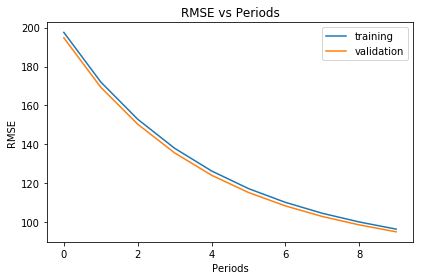

In [17]:
_ = train_model(
    learning_rate=1.0,
    steps=500,
    batch_size=100,
    feature_columns=construct_feature_columns(),
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

## Task 2: Train the Model using Feature Crosses